## PCA Approach 1

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('cobra-clean2009.csv', sep=',', header=0,  usecols = lambda column : column in ['Occur Time', 'UCR #', 'Longitude', 'Latitude', 'Day of Week', 'Crime Category'])
#df = pd.read_csv('cobra-counts2019.csv', sep=',', header=0,  usecols = lambda column : column in ['Month', 'Day of Month', 'Day of Week', 'Category 1', 'Category 2', 'Category 3', 'Category 4'])
#df = pd.read_csv('cobra-clean2009.csv', sep=',', header=0)

df.head(n=10)

,Occur Time,UCR #,Longitude,Latitude,Day of Week,Crime Category
0,1145,630,-84.49328,33.68845,3,4
1,1330,630,-84.39201,33.75320,3,4
2,1450,630,-84.36212,33.84676,3,4
3,1600,630,-84.49773,33.68677,3,4
4,1645,630,-84.34875,33.75786,3,4
5,1740,630,-84.45385,33.70827,3,4
6,1627,630,-84.36212,33.84676,3,4
7,815,630,-84.48742,33.68841,3,4
8,100,640,-84.43612,33.71464,3,4
9,130,640,-84.34595,33.76675,3,4


In [133]:
print(df['Day of Week'].unique())

[3 4 5 6 0 1 2]


In [77]:
features = ['Occur Time', 'UCR #', 'Longitude', 'Latitude', 'Day of Week']

## Counts features
#features = ['Month', 'Day of Month', 'Day of Week', 'Category 1', 'Category 2', 'Category 3', 'Category 4']
x = df.loc[:, features].values

y = df.loc[:,['Crime Category']].values

x = StandardScaler().fit_transform(x)

In [90]:
pca = PCA(n_components=2)

principalComp = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComp, columns = ['principal component 1', 'principal component 2'])

In [79]:
finalDf = pd.concat([principalDf, df[['Crime Category']]], axis = 1)

In [80]:
print(finalDf)

        principal component 1  principal component 2  Crime Category
0                    2.255266              -0.413635               4
1                   -0.171097               0.050836               4
2                   -1.968972               0.299794               4
3                    2.176096              -0.845231               4
4                   -0.967008              -0.014232               4
5                    1.196046              -0.712447               4
6                   -2.033650               0.141627               4
7                    2.293168              -0.090967               4
8                    1.409661               0.850474               4
9                   -0.622766               1.371743               4
10                  -0.409137               0.552328               4
11                  -0.355177              -0.002865               4
12                  -2.067122               0.061891               4
13                  -0.579612     

In [81]:
print(df['Crime Category'].unique())

[4 2 3 1]


In [35]:
import warnings
warnings.filterwarnings('ignore')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

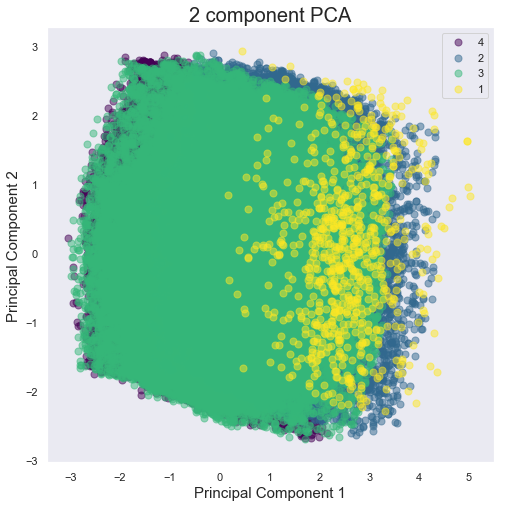

In [83]:
import random
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = [4, 3, 2, 1]
targets = df['Crime Category'].unique()
colors = cm.get_cmap('viridis', len(targets))
#print(type)
#colors = []
#r = random.random
#for i in range(0,len(targets)):
#    rgb = (r(),r(),r())
#    colors.append(rgb)
#print(len(targets))
#print(colors.colors)
#colors = ['r', 'g', 'b']


for target, color in zip(targets,colors.colors):
    #print(color[:3])
    #print(len(color))
    indicesToKeep = finalDf['Crime Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.5)
    #print(indicesToKeep)
ax.legend(targets)
ax.grid()


In [84]:
pca.explained_variance_ratio_

array([0.25716215, 0.2042515 ])

In [38]:
print(pca.components_)

[[-0.67770887  0.36863573 -0.6362534 ]
 [-0.12787506 -0.91116091 -0.39170621]]


Text(0, 0.5, 'Cumulative Explained Variance')

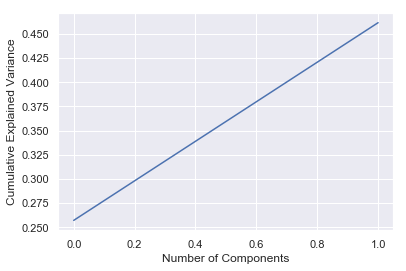

In [91]:
# Potential plotting, but also garbage

x = df.loc[:, features].values
pca_2 = PCA().fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

## Pure Testing of Seaborn Vis
#### Could be useful for either:
#### 1) Data exploration visualization (feature plot)
#### 2) PCA/LDA results 

In [85]:
import seaborn as sns

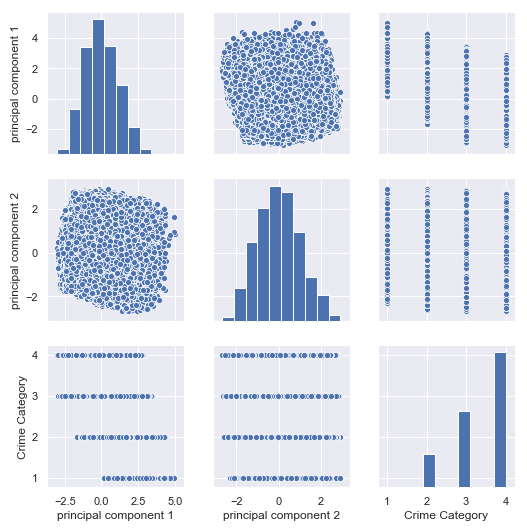

In [86]:
test_pair = sns.pairplot(finalDf)

# PCA Approach 2

### Loading Data

In [141]:
features = ['Occur Time', 'UCR #', 'Longitude', 'Latitude', 'Day of Week']
x = df.loc[:, features].values
y = df.loc[:,['Crime Category']].values
x = StandardScaler().fit_transform(x)

In [151]:
def PCA(X, y):
    '''
    Use this function to obtain two PCA components which are later used for plotting
    Returns:
        wine_pca: The PCA components
        explained_variance_ratio: Explained variance ratio of the two PCA components 
        (Hint:use sklearn function)
    '''
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    pca.fit_transform(x)
    #wine_pca = pca.components_
    x_pca = pca.fit(x).transform(x)
    explained_variance_ratio = pca.explained_variance_ratio_
    return(x_pca, explained_variance_ratio)
    raise NotImplementedError
    
x_pca, explained_variance_pca = PCA(x, y)
print('Explained variance ratio of the first two components: %s'
      % str(explained_variance_pca))

Explained variance ratio of the first two components: [0.25716215 0.2042515 ]


In [152]:
def LDA(X, y):
    ''' 
    Use this function to obtain 2 (two) LDA components which are later used for plotting
    Returns:
        wine_lda: The LDA components
    '''
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    init_lda = LinearDiscriminantAnalysis(n_components=2)
    x_lda = init_lda.fit(x,y).transform(x)
    return(x_lda)
    raise NotImplementedError
    
x_lda = LDA(x, y)
lda_var = x_lda.explained_variance_ratio_
print('Explained variance ratio of the first two components: %s'
      % str(lda_var))

C:\Users\Gabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [153]:
print(x_pca.shape)
print(x_lda.shape)
print(y.shape)

(289631, 2)
(289631, 2)
(289631, 1)


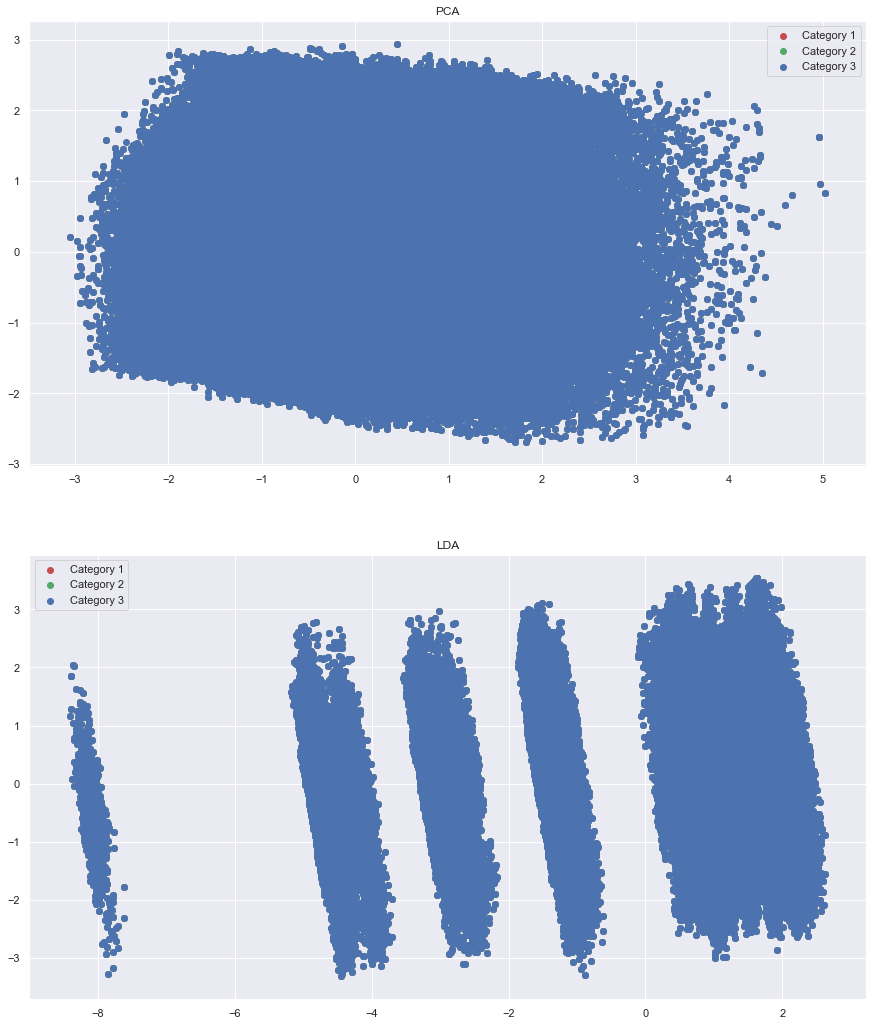

In [156]:
def plot_PCA_LDA(x_pca, x_lda, y):
    """
    Use a scatter plot to plot PCA and LDA components obtained using the functions above.
    Use a different color for each class.
    """
    
    ## Need to plot legend
    size = plt.figure(figsize=(15,18))
    s1 = size.add_subplot(211)
    plt.title("PCA")
    s2 = size.add_subplot(212)
    plt.title("LDA")
    #x_lda = x_lda.transform(x)
    colors = ['r','g','b','y']
    for i in range(1,4):
        
        s1.scatter(x_pca[np.min(np.where(y==i)):np.max(np.where(y==i)),0],
                   x_pca[np.min(np.where(y==i)):np.max(np.where(y==i)),1],label="Category "+str(i), c=colors[i-1])
        s2.scatter(x_lda[np.min(np.where(y==i)):np.max(np.where(y==i)),0],
                   x_lda[np.min(np.where(y==i)):np.max(np.where(y==i)),1],label="Category "+str(i), c=colors[i-1])
       
    s1.legend()
    s2.legend()
    

    
plot_PCA_LDA(x_pca, x_lda, y)